In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm


In [2]:
pd.set_option('display.max_colwidth', 100)

In [3]:
data1 = pd.read_csv("data/train_bodies.csv")
data2 = pd.read_csv("data/train_stances.csv")
data3 = pd.read_csv("data/val_data.csv")
data1.head()

,Body ID,articleBody
0,0,"A small meteorite crashed into a wooded area in Nicaragua's capital of Managua overnight, the go..."
1,4,"Last week we hinted at what was to come as Ebola fears spread across America. Today, we get conf..."
2,5,(NEWSER) – Wonder how long a Quarter Pounder with cheese can last? Two Australians say they boug...
3,6,"Posting photos of a gun-toting child online, ISIS supporters announced that the group’s youngest..."
4,7,At least 25 suspected Boko Haram insurgents were killed in clashes between soldiers and the Isla...


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Body ID      1683 non-null   int64 
 1   articleBody  1683 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [5]:
data2.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodies' near Mexico town where 43 students disappeared...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza as Israel opens dams,158,agree
2,"Christian Bale passes on role of Steve Jobs, actor reportedly felt he wasn't right for part",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV Streaming Service Launching in April,1034,unrelated
4,Spider burrowed through tourist's stomach and up into his chest,1923,disagree


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  49972 non-null  object
 1   Body ID   49972 non-null  int64 
 2   Stance    49972 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [7]:
# the output signifies that each body id is associated to multiple headlines
data2['Body ID'].value_counts()

Body ID
1921    187
1948    175
40      172
524     171
1549    166
       ... 
16        1
65        1
114       1
24        1
1066      1
Name: count, Length: 1683, dtype: int64

In [8]:
#count = 0
#for i in tqdm(range(data2.shape[0])):
#   for j in range(data1.shape[0]):
#       if data1.loc[j,'Body ID']==data2.loc[i,'Body ID']:
#            data2.loc[i,'articleBody'] = data1.loc[j,'articleBody']

#data2.to_csv('data_combined.csv',index=False)

In [9]:
train_data = pd.read_csv('data_combined.csv')
data = pd.read_csv("data_combined.csv")
data['stance_num'] = data['Stance'].map({'agree':0,'disagree':1,'discuss':2,'unrelated':3}).astype(int)
data['title'] = data['Headline'].rename({'Headline':'title'})
data['content'] = data['articleBody'].rename({'articleBody':'content'})
data['id'] = data['Body ID'].rename({'Body ID':'content'})

data.drop(columns=['Headline','articleBody','Body ID'],inplace=True)

data.set_index('id',inplace=True)
#data.sort_index(inplace=True)
data.head()

KeyError: 'Headline'

sb.countplot()

In [ ]:
data.to_csv('data_combined2.csv',index=False)

In [ ]:
data.Stance.value_counts(), data.stance_num.value_counts()

(Stance
 unrelated    36545
 discuss       8909
 agree         3678
 disagree       840
 Name: count, dtype: int64,
 stance_num
 3    36545
 2     8909
 0     3678
 1      840
 Name: count, dtype: int64)

In [ ]:
import seaborn as sb

<AxesSubplot:xlabel='Stance', ylabel='count'>

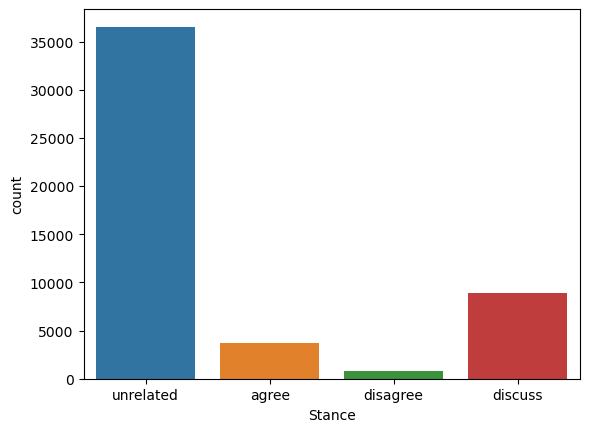

In [ ]:
sb.countplot(data=data,x='stance_num')

In [ ]:
val_data = pd.read_csv("/Users/mandeebot/Desktop/fin_project/data/val_data.csv")
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10732 entries, 0 to 10731
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    10732 non-null  int64  
 1   id            10732 non-null  int64  
 2   title         10732 non-null  object 
 3   author        10732 non-null  object 
 4   content       10732 non-null  object 
 5   date          10732 non-null  object 
 6   year          10732 non-null  float64
 7   month         10732 non-null  float64
 8   front_page    10732 non-null  bool   
 9   url           10732 non-null  object 
 10  date_counter  10732 non-null  object 
 11  stems         10732 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 932.9+ KB


In [ ]:
val_data.title.value_counts()

title
How the Russia Inquiry Began: A Campaign Aide, Drinks and Talk of Political Dirt - The New York Times    2
Germany Sets Gender Quota in Boardrooms - The New York Times                                             2
Boko Haram Generates Uncertainty With Pledge of Allegiance to Islamic State - The New York Times         2
Move Over Mao: Beloved ‘Papa Xi’ Awes China  - The New York Times                                        2
Charter School in Miami Fails, but Proves Useful on Jeb Bush’s Résumé - The New York Times               2
                                                                                                        ..
Right and Left on Trump’s DACA Decision - The New York Times                                             1
‘Brexit’ Threatens Subsidies for U.K.’s Landed Gentry, and Queen - The New York Times                    1
In Texas, Distrust of Washington Collides With Need for Federal Aid - The New York Times                 1
Traces of Crime: How New York’s

In [ ]:
val_data.content.value_counts()

content
WASHINGTON — During a night of heavy drinking at an upscale London bar in May 2016, George Papadopoulos, a young foreign policy adviser to the Trump campaign, made a startling revelation to Australia’s top diplomat in Britain: Russia had political dirt on Hillary Clinton. About three weeks earlier, Mr. Papadopoulos had been told that Moscow had thousands of emails that would embarrass Mrs. Clinton, apparently stolen in an effort to try to damage her campaign. Exactly how much Mr. Papadopoulos said that night at the Kensington Wine Rooms with the Australian, Alexander Downer, is unclear. But two months later, when leaked Democratic emails began appearing online, Australian officials passed the information about Mr. Papadopoulos to their American counterparts, according to four current and former American and foreign officials with direct knowledge of the Australians’ role. The hacking and the revelation that a member of the Trump campaign may have had inside information about it

In [ ]:
val_data[['id','title','content']].head()

,id,title,content
0,2,"How the Russia Inquiry Began: A Campaign Aide, Drinks and Talk of Political Dirt - The New York ...","WASHINGTON — During a night of heavy drinking at an upscale London bar in May 2016, George Papad..."
1,3,"For Trump, a Year of Reinventing the Presidency - The New York Times","WASHINGTON — When President Trump meets with aides to discuss policy or prepare for a speech, he..."
2,4,The U.S. Has Pummeled Al Qaeda in Yemen. But the Threat Is Barely Dented. - The New York Times,"MANAMA, Bahrain — The United States has tripled the number of airstrikes this year against Al Qa..."
3,5,Why an Upstate Prisoner With a History of Escape Foiled His Latest - The New York Times,The plan sounds ingenious. Remove two small security screws and combine them to create a tool to...
4,6,"In Fire-Scarred Bronx Neighborhood, a World of New Arrivals, Children and Community - The New Yo...","Even on a nose-numbingly cold morning, families were out on the sidewalks around Prospect Avenue..."
